# Classificando as Frutas de Acordo com as Informações Apresentadas

### Neste projeto temos uma medidas e a clssificação de uma fruta, dai queremos testar três possibilidades.

1. Qual modelo performa melhor?

2. Diminuindo as variaveis melhora o modelo? 

In [1]:
# Importando os módulos
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

O link do dataset pode ser encontrado [aqui](https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets)

In [2]:
frutas = pd.read_excel('/home/gustavo/Área de Trabalho/Proj notebooks/Date_Fruit_Datasets.xlsx')

In [3]:
frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

Podemos ver que não temos valores nulos e só a variavel class é um objeto, os outros ou são inteiros ou float.

In [4]:
frutas.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


Podemos ver que os valores entre as variaveis não tem o mesmo peso, então será necessário normalizar.

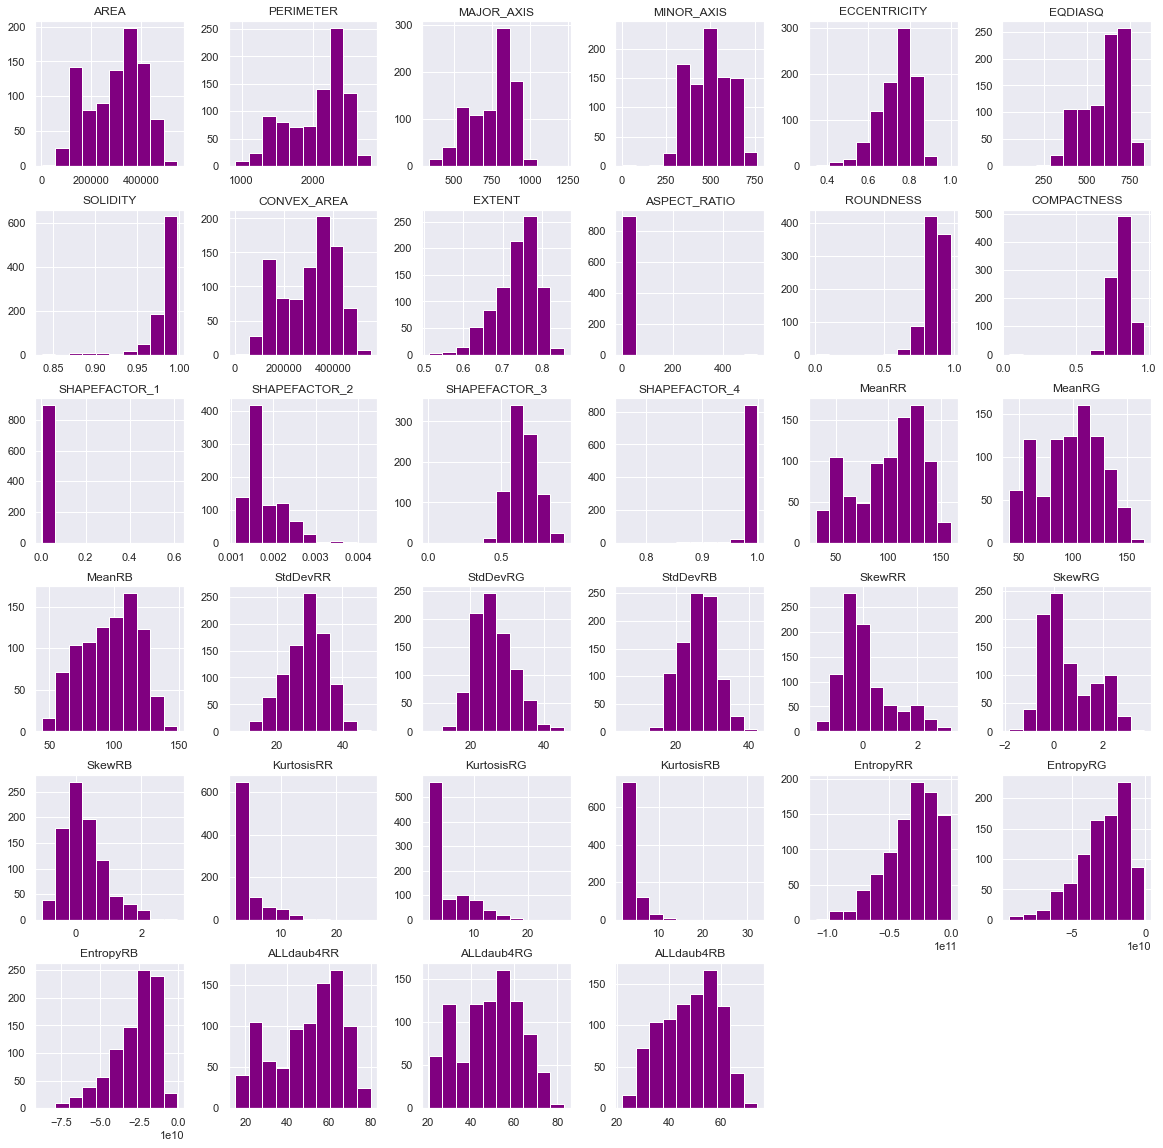

In [5]:
sns.set(style='darkgrid',rc= {'figure.figsize':(20,20)})
frutas.hist(color='purple');

In [6]:
frutas[['SOLIDITY','ASPECT_RATIO','SHAPEFACTOR_1','SHAPEFACTOR_4']].describe()

,SOLIDITY,ASPECT_RATIO,SHAPEFACTOR_1,SHAPEFACTOR_4
count,898.000000,898.000000,898.000000,898.000000
mean,0.981840,2.131102,0.003428,0.988680
std,0.018157,17.820778,0.020456,0.020473
min,0.836600,1.065300,0.001700,0.756800
25%,0.978825,1.373725,0.002200,0.989300
50%,0.987300,1.524150,0.002600,0.993600
75%,0.991800,1.674750,0.003200,0.996400
max,0.997400,535.525700,0.615400,0.999500


Text(0, 0.5, 'Quantidade')

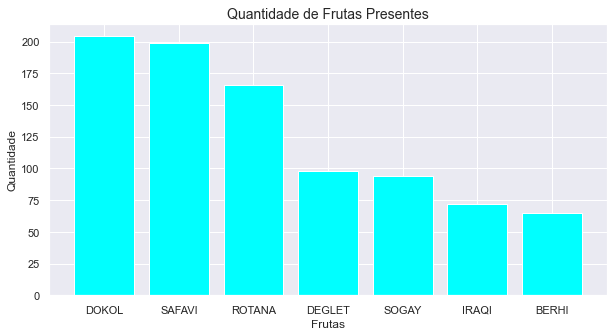

In [7]:
#Criando um gráfico de barras
nomes_frutas = ['DOKOL','SAFAVI','ROTANA','DEGLET','SOGAY','IRAQI','BERHI']
plt.figure(figsize=(10,5))
plt.title('Quantidade de Frutas Presentes',fontsize=14)
plt.bar(nomes_frutas,frutas['Class'].value_counts(),color='cyan')
plt.xlabel('Frutas')
plt.ylabel('Quantidade')

Acredito que vai se ter que dividir os dados para que o mesmo não fique enviesado, separ um com as três frutas e o outro com o resto das frutas.

Fazer o estudo dos outliers

<AxesSubplot:xlabel='Class', ylabel='AREA'>

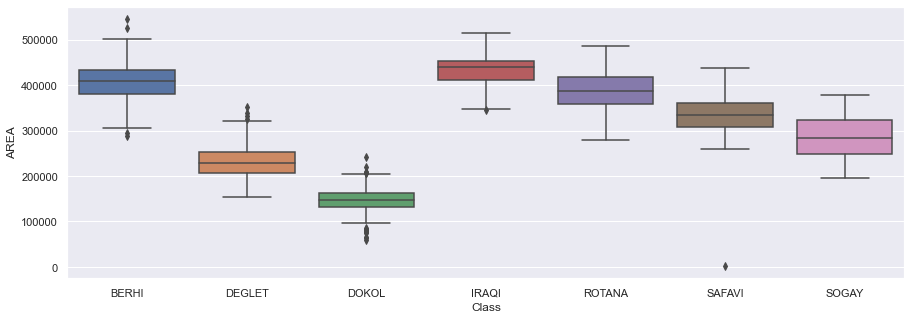

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Class',y='AREA',data=frutas)

<AxesSubplot:xlabel='Class', ylabel='PERIMETER'>

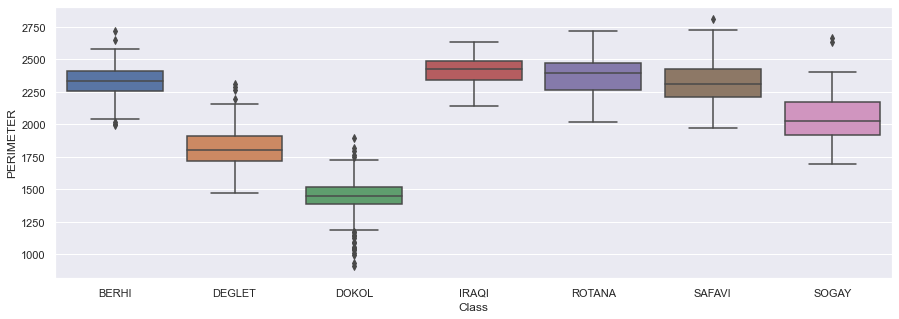

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Class',y='PERIMETER',data=frutas)

In [10]:
frutas['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [11]:
frutas_1 = frutas[frutas['Class']=='DOKOL'].append(frutas[frutas['Class']=='SAFAVI'].append(frutas[frutas['Class']=='ROTANA']))

/tmp/ipykernel_9500/293768214.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas_1 = frutas[frutas['Class']=='DOKOL'].append(frutas[frutas['Class']=='SAFAVI'].append(frutas[frutas['Class']=='ROTANA']))
/tmp/ipykernel_9500/293768214.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas_1 = frutas[frutas['Class']=='DOKOL'].append(frutas[frutas['Class']=='SAFAVI'].append(frutas[frutas['Class']=='ROTANA']))


In [12]:
frutas_1.reset_index(inplace=True)
frutas_1.drop(['index'],axis=1,inplace=True)


In [13]:
frutas_2 = frutas[frutas['Class']=='DEGLET'].append(
    frutas[frutas['Class']=='SOGAY'].append(frutas[frutas['Class']=='IRAQI'].append(frutas[frutas['Class']=='BERHI']))
)

/tmp/ipykernel_9500/184989641.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas[frutas['Class']=='SOGAY'].append(frutas[frutas['Class']=='IRAQI'].append(frutas[frutas['Class']=='BERHI']))
/tmp/ipykernel_9500/184989641.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas[frutas['Class']=='SOGAY'].append(frutas[frutas['Class']=='IRAQI'].append(frutas[frutas['Class']=='BERHI']))
/tmp/ipykernel_9500/184989641.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas_2 = frutas[frutas['Class']=='DEGLET'].append(


In [14]:
frutas_2.reset_index(inplace=True)
frutas_2.drop(['index'],axis=1,inplace=True)


Agora vamos verificas quais dos modelos performa melhor: random forest, knn e naive bayes.

In [15]:
x = frutas_1.drop(['Class'],axis=1).values
y = frutas_1.Class.values

In [16]:
# Importando os módulos do sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

Classificando por random forest

In [17]:
x_std = StandardScaler().fit_transform(x)

In [18]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_std,y,test_size=0.4,random_state=11)

In [19]:
random_for = RandomForestClassifier()
random_for.fit(x_treino,y_treino)
y_pred = random_for.predict(x_teste)

In [20]:
confusion_matrix(y_teste,y_pred)

array([[82,  0,  0],
       [ 0, 61,  0],
       [ 1,  0, 84]])

In [21]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

       DOKOL       0.99      1.00      0.99        82
      ROTANA       1.00      1.00      1.00        61
      SAFAVI       1.00      0.99      0.99        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [22]:
naive_ba = GaussianNB()
naive_ba.fit(x_treino,y_treino)
y_pred_bay = naive_ba.predict(x_teste)

In [23]:
confusion_matrix(y_teste,y_pred_bay)

array([[82,  0,  0],
       [ 0, 61,  0],
       [ 0,  0, 85]])

In [24]:
print(classification_report(y_teste,y_pred_bay))

              precision    recall  f1-score   support

       DOKOL       1.00      1.00      1.00        82
      ROTANA       1.00      1.00      1.00        61
      SAFAVI       1.00      1.00      1.00        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [25]:
knn = KNeighborsClassifier()
knn.fit(x_treino,y_treino)
y_pred_knn = knn.predict(x_teste)

In [26]:
confusion_matrix(y_teste,y_pred_knn)

array([[81,  1,  0],
       [ 0, 61,  0],
       [ 0,  0, 85]])

In [27]:
print(classification_report(y_teste,y_pred_knn))

              precision    recall  f1-score   support

       DOKOL       1.00      0.99      0.99        82
      ROTANA       0.98      1.00      0.99        61
      SAFAVI       1.00      1.00      1.00        85

    accuracy                           1.00       228
   macro avg       0.99      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [28]:
print('Métricas do Modelo Usando Random Forest')
print(classification_report(y_teste,y_pred))
print('-'*30)
print('Métricas do Modelo Usando Naive Bayes')
print(classification_report(y_teste,y_pred_bay))
print('-'*30)
print('Métricas do Modelo Usando KNN')
print(classification_report(y_teste,y_pred_knn))

Métricas do Modelo Usando Random Forest
              precision    recall  f1-score   support

       DOKOL       0.99      1.00      0.99        82
      ROTANA       1.00      1.00      1.00        61
      SAFAVI       1.00      0.99      0.99        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

------------------------------
Métricas do Modelo Usando Naive Bayes
              precision    recall  f1-score   support

       DOKOL       1.00      1.00      1.00        82
      ROTANA       1.00      1.00      1.00        61
      SAFAVI       1.00      1.00      1.00        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

------------------------------
Métricas do Modelo Usando KNN
              precision    recall  f1-score   support

       DOKOL 

Olhando para o dataframe fruta 2

In [29]:
frutas_2.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,230122,1804.3540,649.0608,454.5320,0.7139,541.2952,0.9883,232846,0.8192,1.4280,...,3.8148,2.9127,3.3667,-41959481344,-37230223360,-36367020032,66.1163,63.2356,62.4892,DEGLET
1,231946,1800.8101,678.9835,436.4881,0.7660,543.4361,0.9922,233763,0.7924,1.5556,...,3.1537,3.5782,3.2341,-25391267840,-23603490816,-28687542272,52.4342,51.0893,55.8778,DEGLET
2,218006,1754.2820,671.6726,414.5850,0.7868,526.8528,0.9930,219532,0.8089,1.6201,...,2.0128,2.3344,4.0136,-27197134848,-21465534464,-22162524160,54.3825,49.5349,51.3752,DEGLET
3,272074,2031.7810,778.5798,446.9384,0.8188,588.5706,0.9823,276985,0.8072,1.7420,...,3.0403,2.5393,2.5903,-46827319296,-45142360064,-33304205312,64.1701,62.9819,54.2980,DEGLET
4,222790,1766.3240,651.6551,436.6493,0.7423,532.6021,0.9932,224312,0.7893,1.4924,...,2.2621,2.1012,2.3364,-35503251456,-32167600128,-28105680896,60.8351,58.4294,55.3596,DEGLET


In [32]:
frutas_2.shape

(329, 35)

In [30]:
x2 = frutas_2.drop(['Class'],axis=1).values
y2 = frutas_2.Class.values

In [31]:
x2_std = StandardScaler().fit_transform(x2)

In [33]:
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2_std,y2,test_size=0.3,random_state=10)

In [34]:
random_for2 = RandomForestClassifier()
naive_ba2 = GaussianNB()
knn2 = KNeighborsClassifier()

In [35]:
random_for2.fit(x2_treino,y2_treino)
naive_ba2.fit(x2_treino,y2_treino)
knn2.fit(x2_treino,y2_treino)

KNeighborsClassifier()

In [36]:
y2_ra_pre = random_for2.predict(x2_teste)
y2_na_pre = naive_ba2.predict(x2_teste)
y2_knn_pre = knn2.predict(x2_teste)

In [38]:
print('Matriz de Confusão rando forest')
print(confusion_matrix(y2_teste,y2_ra_pre))
print('-'*30)

print('Matriz de Confusão naive bayes')
print(confusion_matrix(y2_teste,y2_na_pre))
print('-'*30)

print('Matriz de Confusão knn')
print(confusion_matrix(y2_teste,y2_knn_pre))

Matriz de Confusão rando forest
[[11  0  4  0]
 [ 0 20  0  6]
 [ 1  0 24  0]
 [ 0  4  0 29]]
------------------------------
Matriz de Confusão naive bayes
[[11  0  4  0]
 [ 0 20  0  6]
 [ 1  0 24  0]
 [ 0  4  0 29]]
------------------------------
Matriz de Confusão knn
[[12  0  3  0]
 [ 0 17  0  9]
 [ 2  0 23  0]
 [ 0  6  0 27]]


In [37]:
print('Métricas do Modelo Usando Random Forest')
print(classification_report(y2_teste,y2_ra_pre))
print('-'*30)
print('Métricas do Modelo Usando Naive Bayes')
print(classification_report(y2_teste,y2_na_pre))
print('-'*30)
print('Métricas do Modelo Usando KNN')
print(classification_report(y2_teste,y2_knn_pre))

Métricas do Modelo Usando Random Forest
              precision    recall  f1-score   support

       BERHI       0.92      0.73      0.81        15
      DEGLET       0.83      0.77      0.80        26
       IRAQI       0.86      0.96      0.91        25
       SOGAY       0.83      0.88      0.85        33

    accuracy                           0.85        99
   macro avg       0.86      0.84      0.84        99
weighted avg       0.85      0.85      0.85        99

------------------------------
Métricas do Modelo Usando Naive Bayes
              precision    recall  f1-score   support

       BERHI       0.92      0.73      0.81        15
      DEGLET       0.83      0.77      0.80        26
       IRAQI       0.86      0.96      0.91        25
       SOGAY       0.83      0.88      0.85        33

    accuracy                           0.85        99
   macro avg       0.86      0.84      0.84        99
weighted avg       0.85      0.85      0.85        99

---------------------

Observando a matriz de confusão e as metricas nesse caso pode o que perfomou bem e que poderia ser utilizado é ou o random foret ou o naive bayes já que acertou os mesmo, ma poderia ser utilizada o naive bayes já que o processamento pra se fazer o random forest é maior.